# Neural Network !

![image1](https://drive.google.com/uc?id=11QVToYtjPIaTnaVExlhMDTdBL9dyCMoN)

![image2](https://drive.google.com/uc?id=1GEuDt1Pki7m7CsiK4axjkVhZs92BKgVG)



# NN Training Steps

### 1. Feed forward
- Apply linear transformation and activation function to determine the neurons in the next layers of NN

#### LAYER 1

1. Linear Transformation:

$$
z_1 = A_1 x + b_1
$$

2. Activation Function (sigmoid):

$$
a_1 = \sigma(z_1)
$$

#### LAYER 2

1. Linear Transformation:

$$
z_2 = A_2 a_1 + b_2
$$

2. Activation Function (sigmoid):

$$
a_2 = \sigma(z_2)
$$

### 2. Backpropogate

We will visualize this in a smaller case for clarity:
(in this case W is used for the weight matrices instead of A)

![image-3.png](https://drive.google.com/uc?id=1SjPymYoI0iJPYAJqSKLttuUXjJi7fgB0)

![image-4.png](https://drive.google.com/uc?id=1xyP1ocJGA-pS6z1BUpNISUmlTK09L4g8)


### 3. Update Values of Weights
(h is the learning rate)

![image-5.png](https://drive.google.com/uc?id=1E5OIQQMK-wXDHxSbMdYNacifuAD9weC_)

### 4. Repeat!

---
# Make Neural Network !

## TODO: MAKE A COPY OF THIS ASSIGNMENT AND EDIT

Tips:
- use `print` statements to debug your code
- code small helper functions first and check if correct by running practice tests
- check if matrices are the **correct dimension for matrix multiplication** by printing the matrix or printing the dimension of the matrix (may need to transpose by using `matrix.T` in some cases)
- make sure you understand the math behind feeding forward and backpropogating before implementing the `feed_forward` and `gradient` functions
- The internet is your friend! Look up unknown python syntax and error messages  
- Other potentially useful functions: `np.dot`, `np.random.normal`, `np.exp`, `pd.DataFrame`

# Load Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

# Create Functions

## Small Helper Functions:

#### `sigmoid(z)`
- activation function
-takes in a vector `z` and returns sigmoid `sig_z`

In [ ]:
def sigmoid(z):
    sig_z  = 1/(1+np.exp(-z))
    return sig_z

#### `sigmoid_derivative(a)`
- derivative of activation function - for backpropogation
- takes in vector `a`, such that `a` = `simgoid(z)`, and returns the sigmoid derivative `sig_deriv_a`

In [ ]:
def sigmoid_derivative(a):
    sig_deriv_a = a * (1-a)
    return sig_deriv_a

#### `initialize_random_weights(i,j)`
- initialize an `i` by `j` matrix with random values
- takes in integer dimensions `i` and `j` and returns a `matrix` of random values (from a normal distribution)

In [ ]:
def initialize_random_weights(i,j):
    matrix  = np.random.normal(0, 1 , size=(i, j))
    return matrix

#### `cost_function(y, y_hat)`
- takes in two values `y`, `yhat` and returns `error` between them

In [ ]:
def cost_function(y, y_hat):
    error = (y - y_hat)**2
    return error

## Major Functions:

#### ` feed_forward(x)`
- takes in input vector `x` and applies linear transformation and sigmoid function for layers 1 and 2
- returns output values for layers 1 and 2: `a1` = (a11, a12, a13) and `a2` = (a21)

In [ ]:
def feed_forward(x):
    x = np.reshape(x,(3,1))
    z1 = np.dot(W1,x)+b1
    a1 = sigmoid(z1) #a1 is not needed for forward propagation, just a2 would be enough
    # we need a1 for back propagation
    W2_tp = np.transpose(W2)
    z2 = np.dot(W2_tp,a1)+ b2
    a2 = sigmoid(z2)
    return a1, a2

#### `gradient(x,y,a1,a2)`
- takes in input `x` and output `y` as well as calculated hidden layer `a1` and calculated output layer `a2`
- calculates the gradient (see equations above) and returns change in weight matrices `dA1`, `dA2` and biases `db1`, `db2`

In [ ]:
def gradient(x, y, a1, a2):
    x = np.reshape(x,(3,1))
    part1 = (a2-y) * sigmoid_derivative(a2)
    part2 = np.dot(W2, part1) * sigmoid_derivative(a1)
    dW1 = np.dot(part2,np.transpose(x))
    dW2 = np.dot(part1,np.transpose(a1))
    db1 = part2
    db2 =  part1
    return dW1, dW2, db1 ,db2

#### `train(inputs, outputs, learning_rate, epochs)`
- applies helper functions to train neural network
- does not need to return anything, works by updating weights and biases `A1`, `A2`, `b1`, `b2`

In [ ]:
def train(inputs, outputs, learning_rate, epochs):
    epoch_list = np.zeros(epochs)
    error_list = np.zeros(epochs)
    for epoch in range(epochs):
      error_amount = 0
      for x,y in zip(inputs,outputs):
        a1, a2 = feed_forward(x)
          # edit: calculate error using cost function
        error = cost_function(y,a2)
        error_amount += error

            # edit: backpropogate using gradient function
        dW1, dW2, db1,db2= gradient(x,y,a1,a2)

        global W1, b1, W2, b2
        W1 = W1 - (learning_rate*dW1)
        W2 = W2  - (learning_rate * np.transpose(dW2))
        b1 = b1 - (learning_rate*db1)
        b2 = b2 -(learning_rate*db2)
      error_list[epoch] = error_amount/len(outputs)*100
      epoch_list[epoch] = epoch

    df = pd.DataFrame(error_list,epoch_list)
    return df

#### `test(inputs, outputs)`
- run after training to see if neural network works well on other data points that it didn't see during training
- takes in test `inputs` and `outputs` and returns `percent_correct`

In [ ]:
def test(inputs, outputs):

    error = 0
    for x,y in zip(inputs,outputs):
      a1, a2 = feed_forward(x)
      error+= cost_function(y,a2)

    percent_correct = error/len(outputs)*100

    return percent_correct

# Load Data and Run Neural Network
No editing needed below but can try out different values for `learning_rate` or `epochs`

**NOTE**: make sure to rerun `initialize_random_weights` each time you train the network (otherwise `train` function will have edited the matices and you want them to start random)

### Load Data

In [ ]:
X = pd.read_csv('penguins1.csv', usecols=range(1,4))
X = X.to_numpy()
Y = pd.read_csv('penguins2.csv', usecols=range(1,2))
Y = Y.to_numpy()

# normalize X dataset
X = normalize(X, axis=1, norm='l2')




1
2


### Split into test (`x_test`, `y_test`) and train (`x_train`, `y_train`) datasets

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

### Initialize values of weights `A1`, `A2` and biases `b1`, `b2`

In [ ]:
#Weights
W1 = initialize_random_weights(3,3)
W2 = initialize_random_weights(3,1)

#Biases
b1 = initialize_random_weights(3,1)
b2 = initialize_random_weights(1,1)
learning_rate = .1
epochs = 500


W1

array([[-1.67237297,  1.19501244, -1.38389505],
       [ 0.95371361,  1.13643696,  1.30200786],
       [-0.64828239,  1.17193464, -0.29900236]])

In [ ]:
W1

array([[ 1.67528915,  0.51959684,  1.67361119],
       [-0.48316135,  1.1095308 ,  0.49779618],
       [-0.19396953, -0.54603797, -2.25358435]])

### `train`

In [ ]:
df = train(x_train, y_train, .1, 500)

In [ ]:
df #Epochs are the index and the 0 column refers to the percentage of error

,0
0.0,24.903346
1.0,24.914060
2.0,24.945327
3.0,24.945727
4.0,24.942558
...,...
495.0,4.479190
496.0,4.447427
497.0,4.416004
498.0,4.384915


### `test`

In [ ]:
test_error =test(x_test, y_test)
float(test_error[0])

6.607405197474248

# Analysis (Train Error)

1. How are the weight matrices updated?
    - print the weight matrices every 50 epochs in `train` function
    
    

2. How does the error change over epochs?
    - implement a method of calculating and graphing the change in error of your neural network in `train` function
    -I did this by returning a pandas dataframe, `error_df`, from the `train` function that contained two columns, the epoch number and the calculated error for that epoch (remember to average over the whole epoch).  Then I plotted using `error_df.plot(x = "epoch", y = "error")`. There are many different ways this could be done though!
    
    Want to make something like this:
    
    ![image-4.png](https://drive.google.com/uc?id=10LqjzKCplZjWXnSxuGjQYF8ycTToNx9K)

  

Graph of Error

Text(0.5, 1.0, 'Error as Epochs Increases')

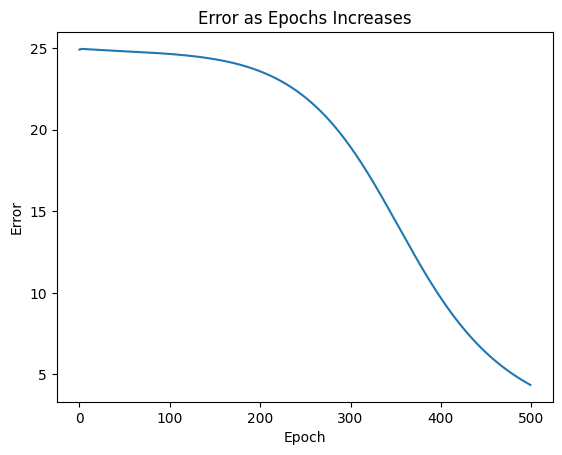

In [ ]:
d = df.reset_index()

d

x =d['index']
y = d[0]


plt.plot(x, y)

# naming the x axis
plt.xlabel("Epoch")
# naming the y axis
plt.ylabel('Error')

# giving a title to my graph
plt.title("Error as Epochs Increase")